# Data & Things

## Lecture : IoT and Data

# Simulate sensor data & apply PCA

In this exercise, you will do the following:
1. Simulate sensor data
2. Apply PCA to simulated data
3. Simulate a new point
4. Find out which region the new point belongs to

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [140]:
# Step 1 Simulate synthetic predictive maintenance dataset
np.random.seed(42)
time_steps = 10000

sensors = {}
for i in range(1, 21):
    sensors[f'Sensor{i}'] = np.linspace(50, 100, time_steps) + np.random.normal(0, 20, time_steps)

# Combine into a DataFrame
data = pd.DataFrame(sensors)

print("Sample Data:")
print(data.head())

Sample Data:
     Sensor1    Sensor2    Sensor3    Sensor4    Sensor5    Sensor6  \
0  59.934283  36.430105  56.965725  10.388561  40.562849  51.964123   
1  47.239714  43.895011  55.671472  28.905288  70.259050  48.722836   
2  62.963772  38.062380  31.279604  38.269433  46.046264  69.045816   
3  80.475599  52.223362  61.606686  53.008380  51.826387  80.671624   
4  45.336935  73.963573  20.218348  70.503249  64.367814  63.756941   

     Sensor7    Sensor8    Sensor9   Sensor10   Sensor11   Sensor12  \
0  51.576755  56.403048  63.280022  69.217891  70.611892  66.017477   
1  61.262950  72.314233  44.082680  42.605706  26.897905  49.021813   
2  56.832040  19.905237  48.678273  38.418383  61.518745  41.079748   
3  24.456718  84.807115  46.507354  68.681245  37.630232  53.375301   
4  46.295596  56.621738  60.301076  -4.610793  43.471946   7.484493   

    Sensor13   Sensor14   Sensor15   Sensor16   Sensor17   Sensor18  \
0  45.626995  72.350652  44.689254  77.397560  78.652455  13.5

In [141]:
# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Display scaled data
print("Scaled Data Sample:")
print(pd.DataFrame(scaled_data, columns=data.columns).head())

Scaled Data Sample:
    Sensor1   Sensor2   Sensor3   Sensor4   Sensor5   Sensor6   Sensor7  \
0 -0.610580 -1.566006 -0.725010 -2.596654 -1.407431 -0.927666 -0.969437   
1 -1.126525 -1.265030 -0.777771 -1.850742 -0.198347 -1.057996 -0.572396   
2 -0.487452 -1.500195 -1.772111 -1.473524 -1.184173 -0.240819 -0.754021   
3  0.224281 -0.929241 -0.535820 -0.879792 -0.948835  0.226649 -2.081098   
4 -1.203859 -0.052701 -2.223025 -0.175043 -0.438209 -0.453482 -1.185914   

    Sensor8   Sensor9  Sensor10  Sensor11  Sensor12  Sensor13  Sensor14  \
0 -0.746813 -0.479506 -0.232249 -0.186682 -0.367113 -1.184181 -0.110562   
1 -0.106939 -1.258090 -1.320570 -1.955170 -1.054209 -0.697301 -0.772550   
2 -2.214587 -1.071707 -1.491814 -0.554553 -1.375289 -0.412171 -0.701019   
3  0.395468 -1.159753 -0.254195 -1.520984 -0.878208 -1.964016 -1.982653   
4 -0.738018 -0.600323 -3.251518 -1.284652 -2.733470 -0.924990 -0.686938   

   Sensor15  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  
0 -1.220616  0

Do the following tasks:
Important! Not understanding linear algebra, but that PCA can explain variance in data
1. Apply PCA with upto 5 components
2. Visualize how much variance of the dataset is defined by each component
3. Visualize the first 2 principal components and color them by timestep
4. Simulate a new position using code below
5. Plot the new point in the original 2D PCA graph

1. Apply PCA with upto 5 components

In [142]:
pca = PCA(n_components=5)

Transforming the scaled data into 5 components, and saving the result in principalComponents:

In [143]:
principalComponents = pca.fit_transform(scaled_data)

In [144]:
principalComponents

array([[-3.69727593,  0.80766087,  0.82701739,  1.78529641, -0.26584149],
       [-4.33036637,  0.30391236, -0.25656186, -0.2643703 , -1.27369547],
       [-4.86936241, -0.67848948,  0.49937539,  0.67710567,  0.59855711],
       ...,
       [ 3.74198462, -0.65540972, -0.83221326, -0.21545078, -0.08432717],
       [ 4.45925873,  0.92342919,  0.03610675, -1.14652759, -0.54213294],
       [ 4.48639875,  0.48192437,  0.23053902,  0.57463599, -0.33279806]],
      shape=(10000, 5))

Let's also make a DF:

In [145]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [146]:
principalDf

,PC1,PC2,PC3,PC4,PC5
0,-3.697276,0.807661,0.827017,1.785296,-0.265841
1,-4.330366,0.303912,-0.256562,-0.264370,-1.273695
2,-4.869362,-0.678489,0.499375,0.677106,0.598557
3,-3.728347,0.066625,0.505255,0.944187,0.119946
4,-5.039456,-0.849799,-2.145603,-0.287005,0.598844
...,...,...,...,...,...
9995,5.057292,1.323372,-1.232449,0.109919,0.330081
9996,5.339193,-0.183616,-0.683768,-0.936819,0.348873
9997,3.741985,-0.655410,-0.832213,-0.215451,-0.084327
9998,4.459259,0.923429,0.036107,-1.146528,-0.542133


In [147]:
pca.explained_variance_ratio_*100

array([37.68736549,  3.59165023,  3.50743595,  3.48923534,  3.42839948])

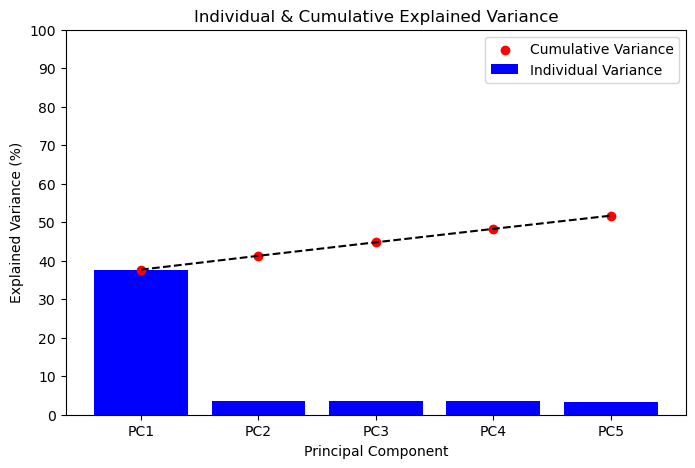

In [148]:
plt.figure(figsize=(8, 5))

# The bar plot for individual variance, for the PCA components. We show in percentage, for easy interpretation.
plt.bar(principalDf.columns, pca.explained_variance_ratio_ * 100, color='b', label='Individual Variance')

# And a nice scatterplot and lineplot, showing the cumulative variance!
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100
plt.scatter(principalDf.columns, cumulative_variance, color='r', label='Cumulative Variance')
plt.plot(principalDf.columns, cumulative_variance, linestyle='dashed', color='black')


plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Individual & Cumulative Explained Variance')
plt.yticks(range(0, 101, 10))  # Added to show from 0-100 in 10s, don't want to see only 0-50
plt.legend()

plt.show()


3. Visualize the first 2 principal components and color them by timestep

Could consider only using 1 PC, as PC2 doesn't add that much to explaining the variance.. 

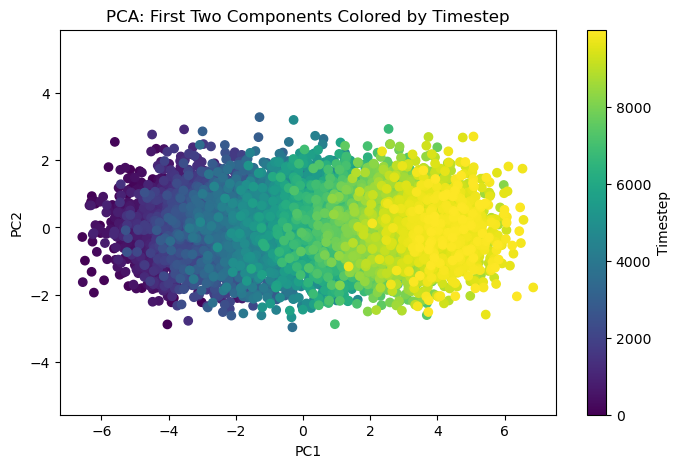

In [149]:
plt.figure(figsize=(8, 5))

scatter = plt.scatter(principalDf['PC1'], principalDf['PC2'], c=range(len(principalDf)), cmap='viridis')

# plt.scatter(new_pca[0, 0], new_pca[0, 1], color='red', marker='X', s=100, label='New Observation')

plt.colorbar(scatter, label='Timestep')
plt.axis('equal') # Equal scaling on both axis, to make the plot more readable. PC1 has more variance than PC2, so their scale is not the same (hence why we need the axis(equal))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Components Colored by Timestep')

# Show plot
plt.show()


4. Simulate a new position using code below

In [150]:
# Step 4: Simulate a new observation and predict its position
new_observation = np.array([[75] * 20])
scaled_new_observation = scaler.transform(new_observation)
new_pca = pca.transform(scaled_new_observation)

print("New observation PCA position:", new_pca)

New observation PCA position: [[-0.00353968  0.01164137 -0.00388459  0.0007376   0.00233923]]


c:\Users\Jacob\miniconda3\envs\dat\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


5. Plot the new point in the original 2D PCA graph

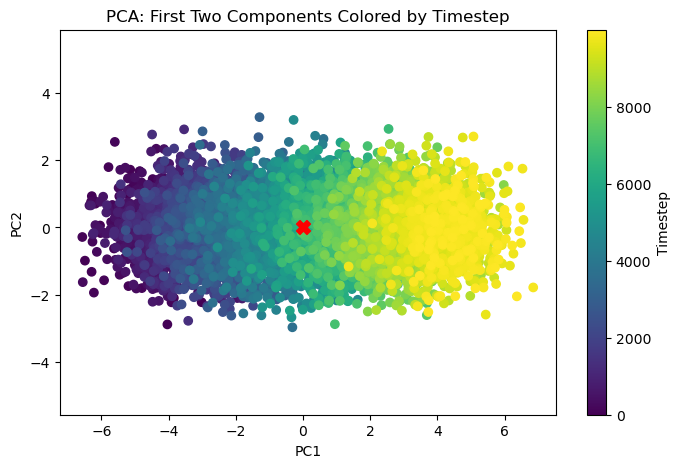

In [ ]:
plt.figure(figsize=(8, 5))

scatter = plt.scatter(principalDf['PC1'], principalDf['PC2'], c=range(len(principalDf)), cmap='viridis')

plt.scatter(new_pca[0, 0], new_pca[0, 1], color='red', marker='X', s=100, label='New Observation')

plt.colorbar(scatter, label='Timestep')
## plt.axis('equal') # Equal scaling on both axis, to make the plot more readable. PC1 has more variance than PC2, so their scale is not the same (hence why we need the axis(equal))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Components Colored by Timestep')

# Show plot
plt.show()


As we don't have the timestamp for the data, we don't know if the value is within the right timestep